# Basic exploration of Justdiggit drone data stored on Google Cloud

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
from osgeo import gdal
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
from google.colab import auth
auth.authenticate_user()

## Loading data sample from GCP

In [ ]:
bucket_name = 'justdiggit-drone'

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  46127      0 --:--:-- --:--:-- --:--:-- 46127
OK
26 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 26 not upgraded.
Need to get 12.1 MB of archives.
After this operation, 27.5 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.41.5_amd64.deb ...
Unpacking gcsfuse (0.41.5) ...
Setting up gcsfuse (0.41.5) ...


In [ ]:
!mkdir justdiggit-drone-data

In [ ]:
!gcsfuse justdiggit-drone justdiggit-drone-data

2022/08/09 19:24:55.366817 Start gcsfuse/0.41.5 (Go version go1.18.4) for app "" using mount point: /content/justdiggit-drone-data
2022/08/09 19:24:55.384246 Opening GCS connection...
2022/08/09 19:24:56.633428 Mounting file system "justdiggit-drone"...
2022/08/09 19:24:56.680582 File system has been successfully mounted.


In [ ]:
!gsutil ls gs://justdiggit-drone/rdp-2019/waida/

gs://justdiggit-drone/rdp-2019/waida/
gs://justdiggit-drone/rdp-2019/waida/DSM.tif
gs://justdiggit-drone/rdp-2019/waida/DTM.tif
gs://justdiggit-drone/rdp-2019/waida/green_band.tif
gs://justdiggit-drone/rdp-2019/waida/nir_band.tif
gs://justdiggit-drone/rdp-2019/waida/ortho_waida_2019.tif
gs://justdiggit-drone/rdp-2019/waida/red_band.tif
gs://justdiggit-drone/rdp-2019/waida/rededge_band.tif


In [ ]:
!mkdir -p justdiggit-drone-data/rdp-2019/waida

In [ ]:
!mkdir -p justdiggit-drone-data/rsp-2021

In [ ]:
!ls justdiggit-drone-data/rdp-2019/*/DSM.tif | wc -l

9


In [ ]:
!ls justdiggit-drone-data/rsp-2021

In [ ]:
!ls justdiggit-drone-data/rdp-2018/bumila

ortho_bumila_2018.tif


In [ ]:
!gsutil ls gs://justdiggit-drone/rsp-2021

gs://justdiggit-drone/rsp-2021/


# Inspecting raw data

In [ ]:
DATA_path = "justdiggit-drone-data/"
program = "rdp"
year = "2019"
village = "chaludewa"
DIR = f"{program}-{year}/{village}"
DIR

'rdp-2019/chaludewa'

## DSM

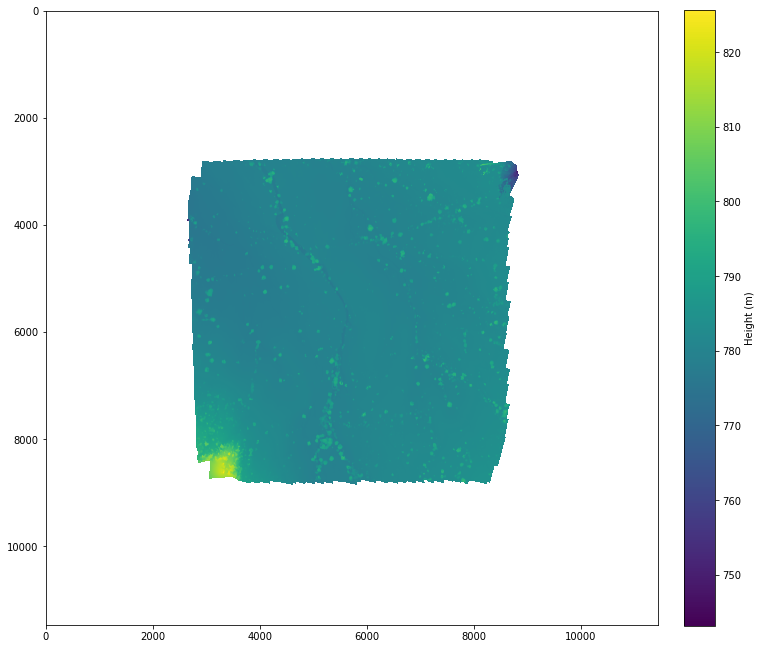

In [ ]:
#path to DSM
DSM_path = os.path.join(DATA_path, DIR, "DSM.tif")

#visualise the DEM
DSM = gdal.Open(DSM_path).ReadAsArray()

#set all values which are invalid to zero
DSM[DSM<0] = np.nan

plt.figure(figsize=(12,16))
plot = plt.imshow(DSM)
plt.colorbar(plot, fraction=0.046, pad=0.04, label = "Height (m)")
plt.show()

## DTM

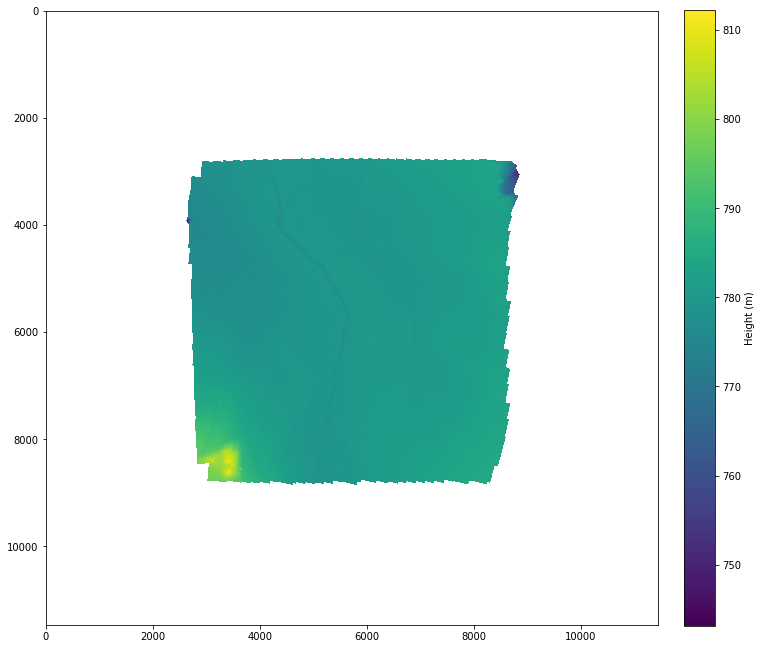

In [ ]:
#path to DTM
DTM_path = os.path.join(DATA_path, DIR, "DTM.tif")

#visualise the DTM
DTM = gdal.Open(DTM_path).ReadAsArray()

#set all values which are invalid to zero
DTM[DTM<0] = np.nan

plt.figure(figsize=(12,16))
plot = plt.imshow(DTM)
plt.colorbar(plot, fraction=0.046, pad=0.04, label = "Height (m)")
plt.show()

## Generating new DSM array

The original DSM values are relative to sea level - we need to subtract the terrain elevation (DTM) to get values relative to the ground

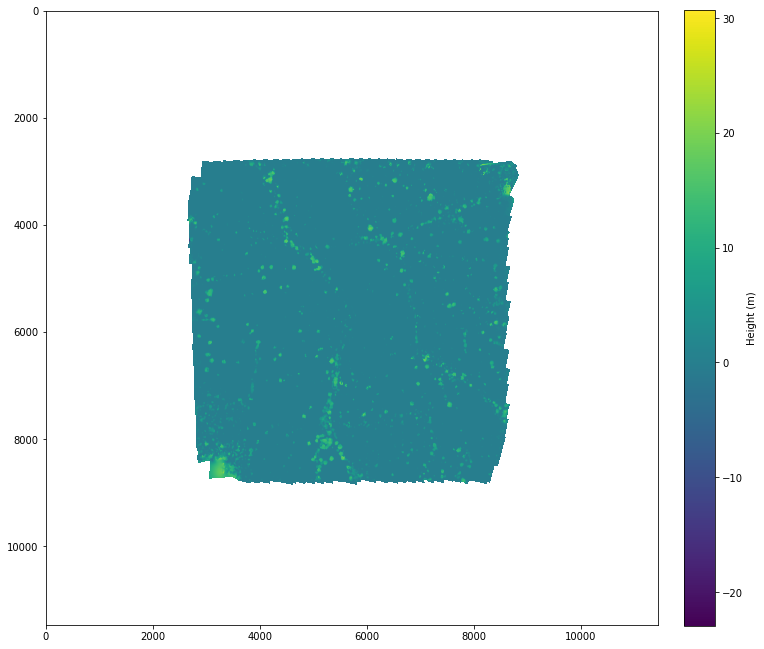

In [ ]:
DSM2 = DSM - DTM
plt.figure(figsize=(12,16))
plot = plt.imshow(DSM2)
plt.colorbar(plot, fraction=0.046, pad=0.04, label = "Height (m)")
plt.show()

justdiggit-drone-data/rdp-2019/chaludewa/ortho_chaludewa_2019.tif


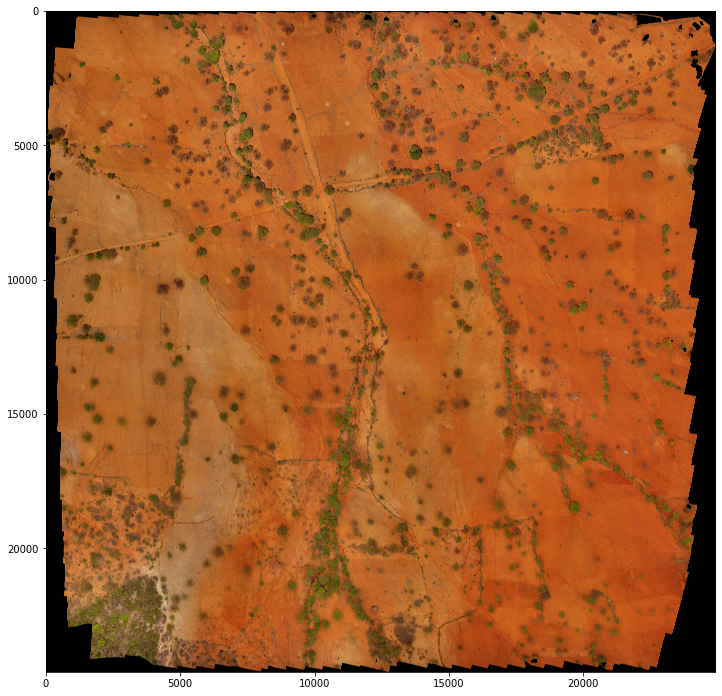

In [ ]:
#path to selected image in data
img_path = os.path.join(DATA_path, DIR, f"ortho_{village}_{year}.tif")
print(img_path)

#read in image to numpy array using opencv library
img_array = cv2.imread(img_path)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 

#display the image
plt.figure(figsize=(12,16))
plt.imshow(img_array)

# Tiles

In [ ]:
!gsutil ls gs://justdiggit-drone

gs://justdiggit-drone/COCO_RDP - Tree annotation kopie.json
gs://justdiggit-drone/COCO_RDP-try pixel.json
gs://justdiggit-drone/label_sample.zip
gs://justdiggit-drone/label_sample_chaludewa2020.zip
gs://justdiggit-drone/.ipynb_checkpoints/
gs://justdiggit-drone/RAP-2021 baseline/
gs://justdiggit-drone/RSP-2021 Cluster A baseline/
gs://justdiggit-drone/Raw_data/
gs://justdiggit-drone/evaluation/
gs://justdiggit-drone/farm-shapes/
gs://justdiggit-drone/label_sample/
gs://justdiggit-drone/output/
gs://justdiggit-drone/predictions/
gs://justdiggit-drone/processed/
gs://justdiggit-drone/rdp-2018/
gs://justdiggit-drone/rdp-2019/
gs://justdiggit-drone/rdp-2020/
gs://justdiggit-drone/rdp-toms/
gs://justdiggit-drone/rsp-2021/
gs://justdiggit-drone/training/
gs://justdiggit-drone/traintest_original/
gs://justdiggit-drone/traintest_sander/


In [ ]:
!gsutil ls gs://justdiggit-drone/processed/waida

gs://justdiggit-drone/processed/waida/
gs://justdiggit-drone/processed/waida/2018/
gs://justdiggit-drone/processed/waida/2019/
gs://justdiggit-drone/processed/waida/2020/


!gsutil ls gs://justdiggit-drone/processed/waida/2019/

output:

gs://justdiggit-drone/processed/waida/2019/waida_year_2019_tile_0_0.png <br>
gs://justdiggit-drone/processed/waida/2019/waida_year_2019_tile_0_0.png.aux.xml <br>
gs://justdiggit-drone/processed/waida/2019/waida_year_2019_tile_0_1000.png <br>
gs://justdiggit-drone/processed/waida/2019/waida_year_2019_tile_0_1000.png.aux.xml <br>
etc.


In [ ]:
!gsutil ls gs://justdiggit-drone/processed/chaludewa/2020/chaludewa_year* | wc -l

1150


In [ ]:
PROCESSED_DATA_PATH = "justdiggit-drone-data/processed"

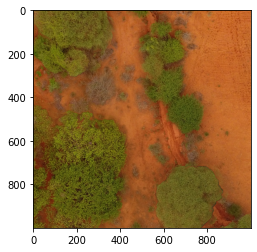

In [ ]:
tile = cv2.imread(os.path.join(PROCESSED_DATA_PATH, \
                               village, \
                               year, \
                               f"{village}_year_{year}_tile_10500_20500.png"))
tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB) 
plt.imshow(tile)

In [ ]:
tile.shape

(1000, 1000, 3)

# Annotations

In [ ]:
import json

anno = json.load(open("justdiggit-drone-data/label_sample/Annotations_trees_only.json"))

In [ ]:
dict(anno).keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [ ]:
anno['categories']

[{'color': [136, 240, 2],
  'id': 1,
  'isthing': 1,
  'name': 'Tree',
  'supercategory': 'Tree'}]

In [ ]:
anno['images'][:2]

[{'file_name': 'bumila_year_2018_tile_6000_12000.png',
  'height': 1000,
  'id': 1,
  'license': 1,
  'width': 1000},
 {'file_name': 'bumila_year_2018_tile_6000_6000.png',
  'height': 1000,
  'id': 2,
  'license': 1,
  'width': 1000}]

In [ ]:
len(anno['images'])

1143

In [ ]:
from collections import Counter
filenames = ["_".join(img['file_name'].split("_")[:3]) for img in anno['images']]
Counter(filenames)

Counter({'bumila_year_2018': 77,
         'bumila_year_2019': 89,
         'chaludewa_year_2018': 86,
         'chaludewa_year_2019': 84,
         'chaludewa_year_2020': 108,
         'ikengwa_year_2018': 79,
         'ikengwa_year_2019': 74,
         'kisima_year_2018': 79,
         'kisima_year_2019': 80,
         'loo_year_2019': 47,
         'mapango_year_2018': 74,
         'mapango_year_2019': 14,
         'mkondai_year_2018': 72,
         'mlimwa_year_2018': 61,
         'pembamoto_year_2018': 55,
         'waida_year_2018': 64})

In [ ]:
len(anno['annotations'])

27238

In [ ]:
img_id = 3
filename = anno['images'][img_id]["file_name"]
print(filename)
relevant_annotations = []
for a in anno["annotations"]:
  if a["image_id"] == img_id:
    relevant_annotations.append(a["bbox"])

bumila_year_2018_tile_5000_6000.png


In [ ]:
relevant_annotations[0]

[364.0, 396.0, 40.0, 45.0]

In [ ]:
len(relevant_annotations)

28

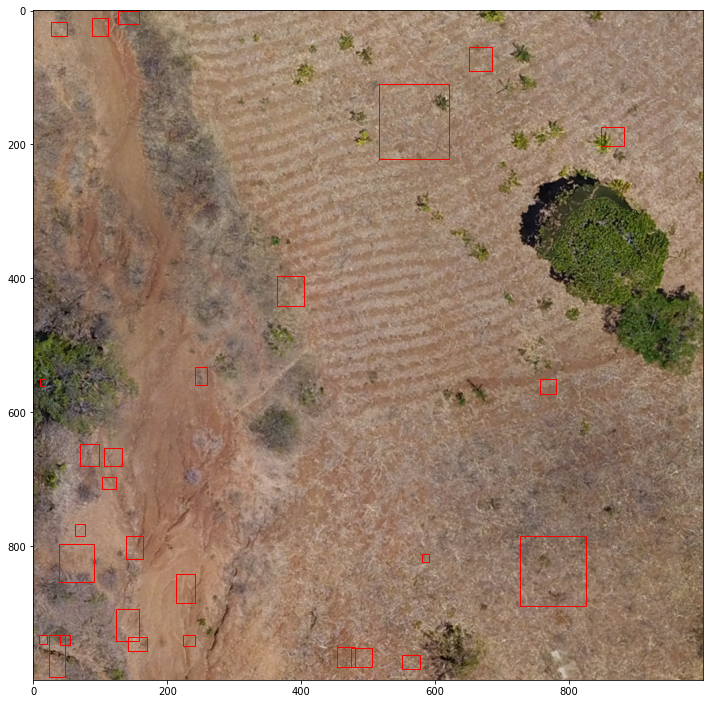

In [ ]:
tile = cv2.imread(f"justdiggit-drone-data/label_sample/{filename}")
tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(12,16))
plt.imshow(tile)
ax = plt.gca()
for bbox in relevant_annotations:

  #bounding box & pixel coordinates for each annotation
  x1, y1, width, height = bbox

  #create the rectangle object and add it to the image
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  ax.add_patch(rect)

## Annotations from evaluation/annotations

BELOW CODE IS NOT READY YET

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
     |████████████████████████████████| 16.7 MB 347 kB/s 


In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, Point

#path to shapefile training data
shp_path = f"justdiggit-drone-data/evaluation/annotations/version-1/{village}_{year}_annotations.shp"

#read in shapefile into a GeoDataFrame
gdf = gpd.read_file(shp_path)

#latitude and longitude information can be inferred from the gdal object
img = gdal.Open(img_path)
geotransform = img.GetGeoTransform()
XSize = img.RasterXSize #image length in X
YSize = img.RasterYSize #image length in Y

#calculate latitude & longitude arrays
lat = np.arange(geotransform[3],geotransform[3] + YSize*geotransform[-1],geotransform[-1])
lon = np.arange(geotransform[0],geotransform[0] + YSize*geotransform[1],geotransform[1])


#base image
fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_array)

#we'll also write these new pixel-based polygons to a new GeoDataFrame for safe-keeping.
pixel_gdf = gdf.copy()
i=0
for geom in gdf.geometry:

    #get coordinates of each tree crown
    xs, ys = geom.exterior.xy

    #find the pixel equivalent
    x_pixel = np.array([np.where(abs(lon-x) == min(abs(lon-x)))[0] for x in xs])
    y_pixel = np.array([np.where(abs(lat-y) == min(abs(lat-y)))[0] for y in ys])

    #draw the tree crown
    ax.fill(x_pixel, y_pixel, alpha=0.7, fc='r', ec='none')

    #save the converted polygons as geometries
    coords = []
    for k in range(len(x_pixel)):
      coords.append(Point(x_pixel[k], y_pixel[k]))

    pixel_gdf.geometry.iloc[i] = Polygon(coords)
    i+=1